Below business model provide the insights about the value depreciation pattern of cars which depends on various usage pattern (Year of purchase, Last numbers of owner, travel distance in Kilometres) with respect to its features (Fuel type, Transmission Drive, Segment).
For a automobile dealer company, this model will forecast a higher transaction rate while dealing categories:
1. Fuel type with segment of automobile.
2. Transmission type with segment of automobile.

#Data Pre-processing

In [136]:
#import all libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [137]:
#import dataset
cars_resale = pd.read_csv('/content/cars_24_combined.csv')

In [138]:
#print first 5 rows of dataset
cars_resale.head()

Unnamed: 0              Car Name    Year  Distance  Owner    Fuel Location  \
0           0       Maruti S PRESSO  2022.0      3878      1  PETROL    HR-98   
1           1         Hyundai Xcent  2018.0     32041      1  PETROL    TN-22   
2           2           Tata Safari  2021.0     96339      1  DIESEL    TS-08   
3           3  Maruti Vitara Brezza  2019.0     51718      1  DIESEL    WB-24   
4           4            Tata Tiago  2021.0     19811      1  PETROL    HR-51   

       Drive       Type    Price  
0     Manual  HatchBack   514000  
1     Manual      Sedan   674000  
2  Automatic        SUV  1952000  
3     Manual        SUV   690000  
4     Manual  HatchBack   526000

In dataset 'cars_resale' there are 10 attributes being 'Price' column as observed price when resold as per other parameters.

In [139]:
#describe columns with numerical data
cars_resale.describe()

Unnamed: 0         Year       Distance        Owner         Price
count  8015.000000  8014.000000    8015.000000  8015.000000  8.015000e+03
mean   4007.000000  2016.995009   52621.411728     1.300187  5.748829e+05
std    2313.875537     2.861454   29182.922728     0.510893  2.651049e+05
min       0.000000  2010.000000       0.000000     1.000000  1.190000e+05
25%    2003.500000  2015.000000   30730.000000     1.000000  3.930000e+05
50%    4007.000000  2017.000000   50359.000000     1.000000  5.350000e+05
75%    6010.500000  2019.000000   71762.000000     2.000000  6.980000e+05
max    8014.000000  2023.000000  971212.000000     4.000000  3.300000e+06

Describing attributes showcase, there are 8015 count of cars resold data that were purchase in range of year 2010-2023, range of distance travelled 0-971212 Kms and maximum of 4 last owners. Price variation of 1.19e+5 to 3.3e+6 depicts the range of 100 thousand to 3 million units of currency.

In [140]:
#information about all columns
cars_resale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8015 entries, 0 to 8014
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8015 non-null   int64  
 1   Car Name    8014 non-null   object 
 2   Year        8014 non-null   float64
 3   Distance    8015 non-null   int64  
 4   Owner       8015 non-null   int64  
 5   Fuel        8015 non-null   object 
 6   Location    7802 non-null   object 
 7   Drive       8015 non-null   object 
 8   Type        8015 non-null   object 
 9   Price       8015 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 626.3+ KB


5 attributes with object (combination of text and numericals) type best describe the category of the cars and 4 attributes with int64(numbers) and 1 attribute 'Year' as float64 to support numerical with decimal entries.

In [141]:
#get sum of all null values
cars_resale.isnull().sum()

Unnamed: 0      0
Car Name        1
Year            1
Distance        0
Owner           0
Fuel            0
Location      213
Drive           0
Type            0
Price           0
dtype: int64

2 columns have only 1 null values but column 'Location' has 213 null values need to handle to increase the accuracy of predictive price.

In [142]:
#percentage of missing values
missing_percentage = cars_resale.isnull().sum() / len(cars_resale) * 100
print(missing_percentage)

Unnamed: 0    0.000000
Car Name      0.012477
Year          0.012477
Distance      0.000000
Owner         0.000000
Fuel          0.000000
Location      2.657517
Drive         0.000000
Type          0.000000
Price         0.000000
dtype: float64


It is possible to drop less than 5% of data rows as it is very small proportion of data.

In [143]:
#drop null value rows
cars_resale = cars_resale.dropna(subset=['Car Name'])
cars_resale = cars_resale.dropna(subset=['Year'])
cars_resale = cars_resale.dropna(subset=['Location'])

#recheck missing Percentage
missing_percentage = cars_resale.isnull().sum() / len(cars_resale) * 100
print(missing_percentage)

Unnamed: 0    0.0
Car Name      0.0
Year          0.0
Distance      0.0
Owner         0.0
Fuel          0.0
Location      0.0
Drive         0.0
Type          0.0
Price         0.0
dtype: float64


Dataset need to have 0 null values to train and test the predictive type model.

In [144]:
#drop extra columns
cars_resale = cars_resale.drop(columns=['Unnamed: 0'])

'Unnamed : 0' is ID column that might be added for identity of rows.

In [145]:
#check of unique values
cars_resale['Year'].unique()

array([2022., 2018., 2021., 2019., 2017., 2015., 2012., 2016., 2010.,
       2011., 2013., 2014., 2020., 2023.])

In [146]:
#replace year column, subtraction of current year from the year
cars_resale['Year'] = 2024 - cars_resale['Year']

This decrease the value of numerical column, also showcase more relevance when describe in year usage.

In [147]:
#find minimum and maximum of high value columns
min_distance = cars_resale['Distance'].min()
print(min_distance)
max_distance = cars_resale['Distance'].max()
print(max_distance)

0
153870


Minimum and maximum values helps to define a bin.

In [148]:
#define new dataframe with labels as bin required
bins = [0, 5000, 20000, 50000, 100000, 200000, float('inf')]
labels = ['0-5k', '5k-20k', '20k-50k', '50k-100k', '100k-200k', '200k+']

#add a new column with binned distances
cars_resale['Distance_Binned'] = pd.cut(cars_resale['Distance'], bins=bins, labels=labels)


Binned distance enables to set ordinal features while defining model.

In [149]:
#check for all values covered in bin by unique function
cars_resale['Distance_Binned'].unique()

['0-5k', '20k-50k', '50k-100k', '5k-20k', '100k-200k', NaN]
Categories (6, object): ['0-5k' < '5k-20k' < '20k-50k' < '50k-100k' < '100k-200k' < '200k+']

It seems due to binning there are some null values assigned to some rows

In [150]:
#missing percentage
missing_percentage = cars_resale.isnull().sum() / len(cars_resale) * 100
print(missing_percentage)

Car Name           0.000000
Year               0.000000
Distance           0.000000
Owner              0.000000
Fuel               0.000000
Location           0.000000
Drive              0.000000
Type               0.000000
Price              0.000000
Distance_Binned    0.025638
dtype: float64


It is possible to drop 0.02% of row columns as it might me 1-2 rows of dataset.

In [151]:
#cars_resale = cars_resale.dropna(subset=['Price_Binned'])
cars_resale = cars_resale.dropna(subset=['Distance_Binned'])

In [152]:
#recheck missing data
missing_percentage = cars_resale.isnull().sum() / len(cars_resale) * 100
print(missing_percentage)

Car Name           0.0
Year               0.0
Distance           0.0
Owner              0.0
Fuel               0.0
Location           0.0
Drive              0.0
Type               0.0
Price              0.0
Distance_Binned    0.0
dtype: float64


In [153]:
#check unique values to assign ordinal function as years must be in order of count
cars_resale['Year'].unique()

array([ 2.,  6.,  3.,  5.,  7.,  9., 12.,  8., 14., 13., 11., 10.,  4.,
        1.])

Usage of cars in years varies from 1-14

In [154]:
#unique values in last owners assigned ordinal feature.
cars_resale['Owner'].unique()

array([1, 2, 3, 4])

There are maximum 4 owners cars available in dataset

In [155]:
#Uniques to assign as ordinal features
cars_resale['Distance_Binned'].unique()

['0-5k', '20k-50k', '50k-100k', '5k-20k', '100k-200k']
Categories (6, object): ['0-5k' < '5k-20k' < '20k-50k' < '50k-100k' < '100k-200k' < '200k+']

#Exploratory Data Analysis

<ipython-input-156-81f925e8f7dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cars_resale['Price'], palette="Set3")


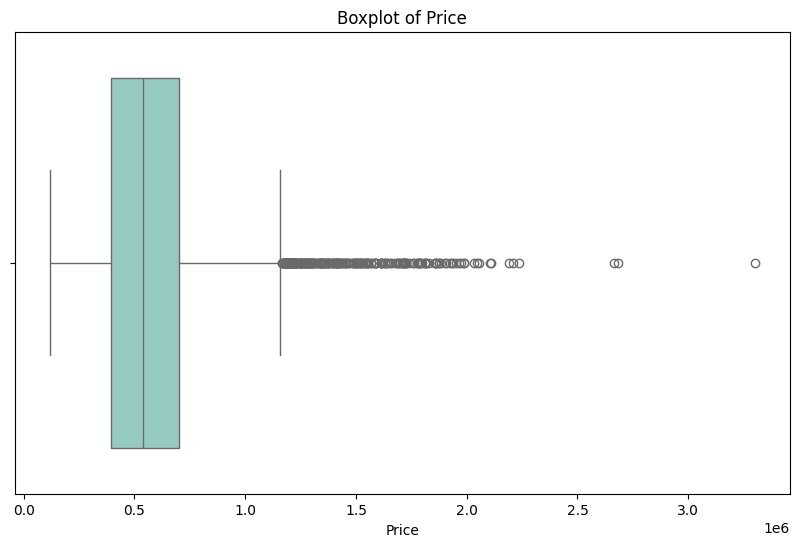

In [156]:
#box plot to detect outliers in target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x=cars_resale['Price'], palette="Set3")
plt.title('Boxplot of Price')
plt.show()

There are atleast 5% of outliers present in traget variable that decrease the prediction of model.

In [157]:
#calculate the 95th percentile value of the 'Price' column
upper_limit = cars_resale['Price'].quantile(0.95)

#cap the Price values at the 95th percentile
cars_resale['Price'] = cars_resale['Price'].clip(upper=upper_limit)

<ipython-input-157-b152c94d0d3b>:5: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars_resale['Price'] = cars_resale['Price'].clip(upper=upper_limit)


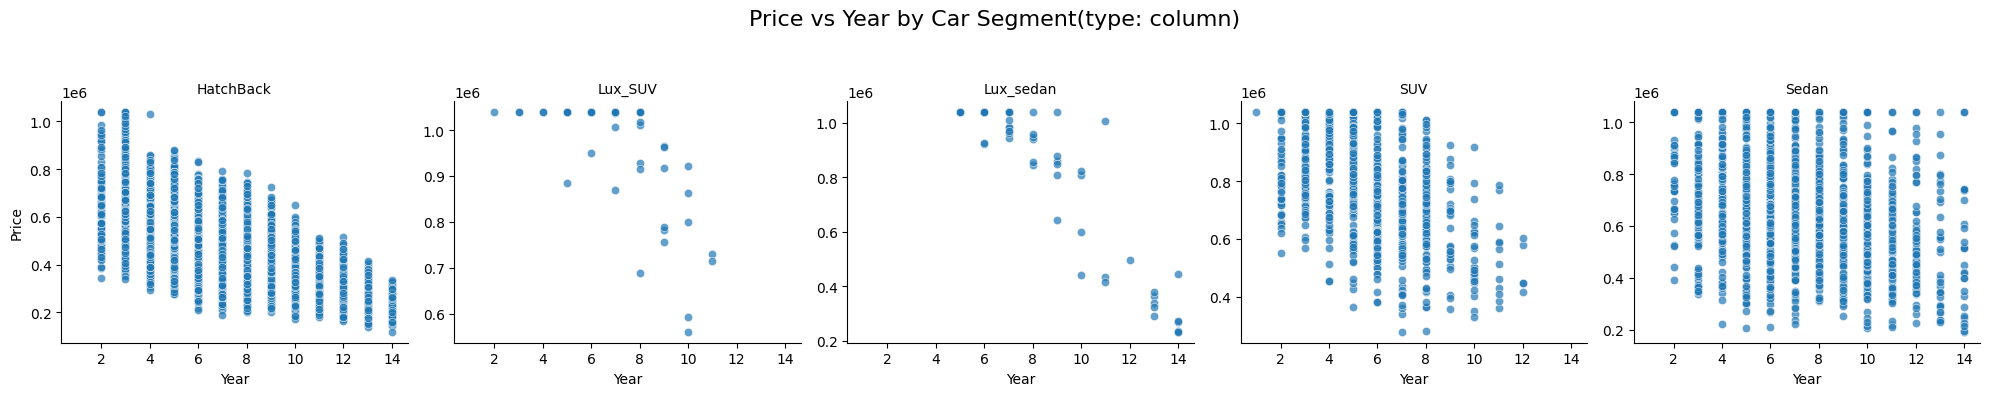

In [158]:
#plot facetGrid: Price vs Year for each Type
cars_resale['Type'] = cars_resale['Type'].astype('category')


g = sns.FacetGrid(cars_resale, col="Type", col_wrap=5, height=4, sharey=False)
g.map(sns.scatterplot, "Year", "Price", alpha=0.7)

# Add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Price")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Price vs Year by Car Segment(type: column)", fontsize=16)
plt.show()

No perfect relation with usage cars in years with price can be seen in particular variant.

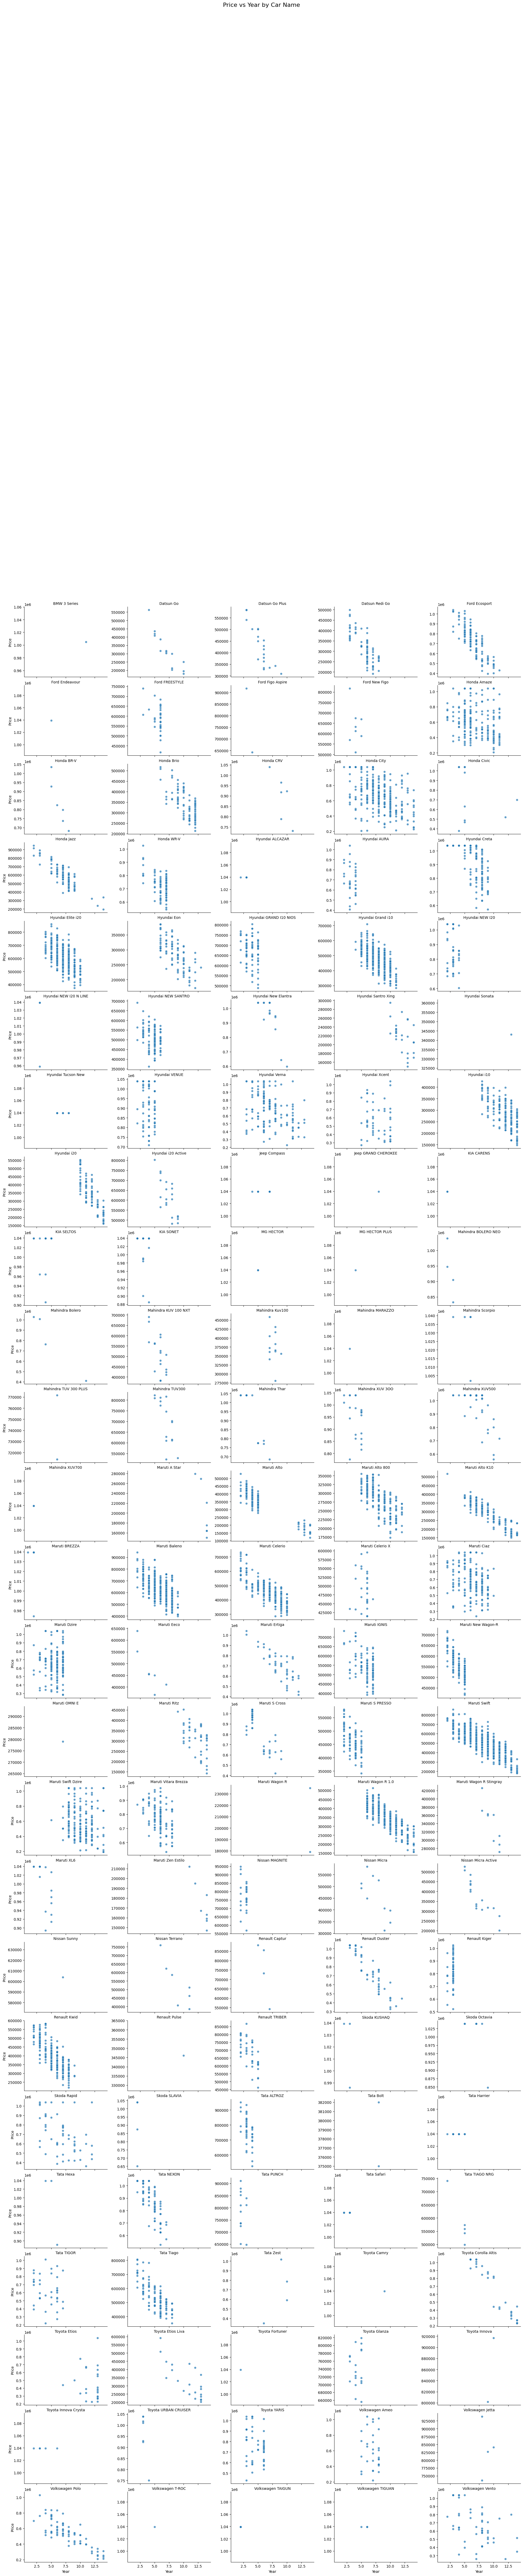

In [159]:
#plot facetGrid: Price vs Year for each Car Name
cars_resale['Car Name'] = cars_resale['Car Name'].astype('category')


g = sns.FacetGrid(cars_resale, col="Car Name", col_wrap=5, height=4, sharey=False)
g.map(sns.scatterplot, "Year", "Price", alpha=0.7)

#add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Price")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Price vs Year by Car Name", fontsize=16)
plt.show()

We can find a relation here but still there are same price values newer cars. Lets try to visualize with distance travelled

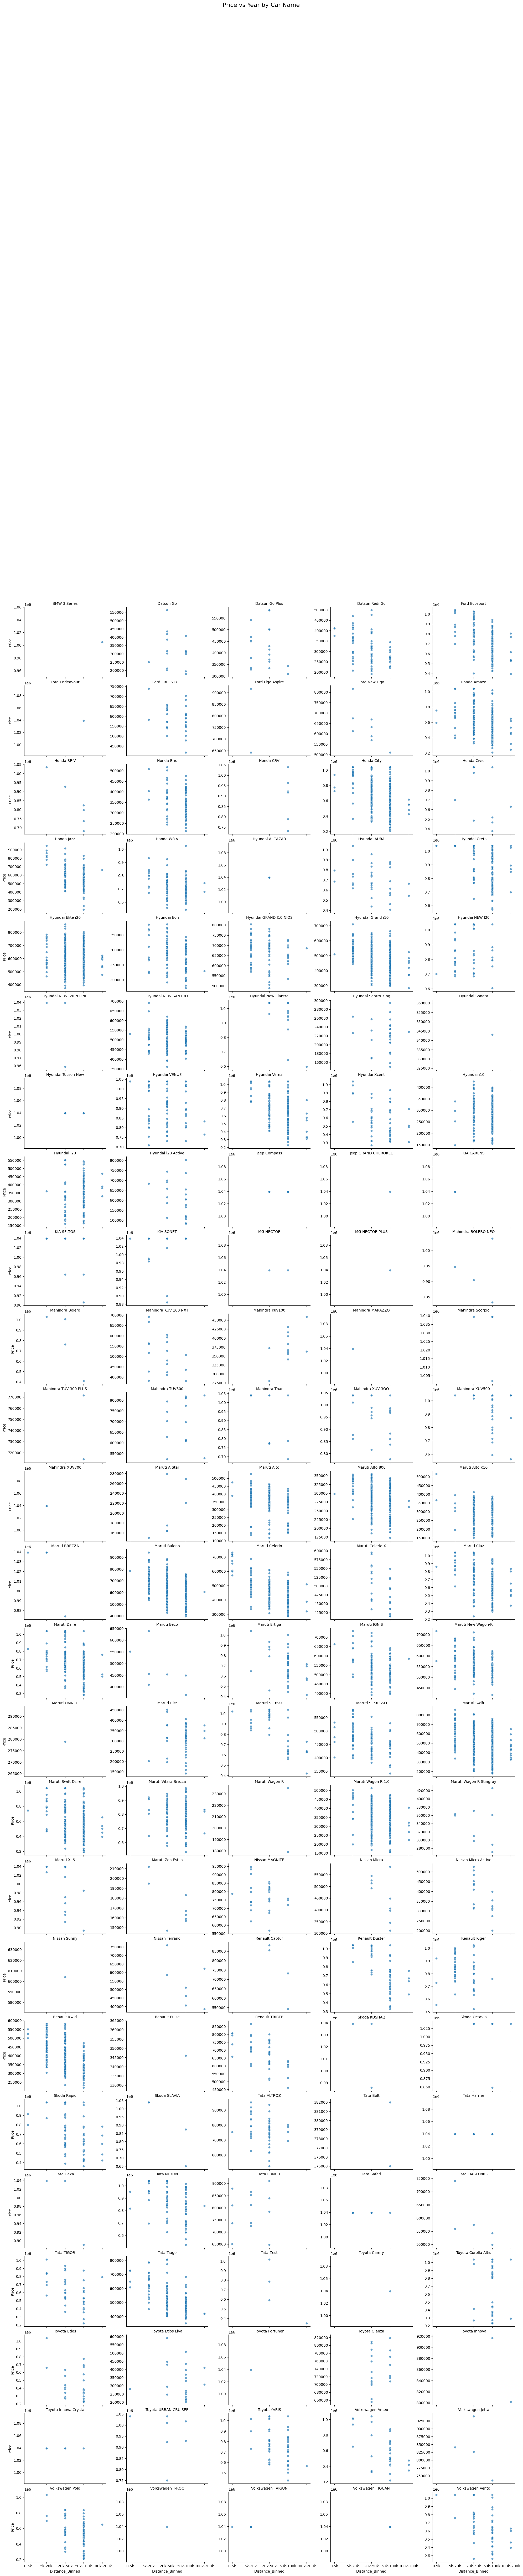

In [160]:
#plot facetGrid: Price vs Year for each Car Name
cars_resale['Car Name'] = cars_resale['Car Name'].astype('category')


g = sns.FacetGrid(cars_resale, col="Car Name", col_wrap=5, height=4, sharey=False)
g.map(sns.scatterplot, "Distance_Binned", "Price", alpha=0.7)

#add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Distance_Binned", "Price")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Price vs Year by Car Name", fontsize=16)
plt.show()

Same pattern, even after travel of longer distance some cars value depreciate less. Lets try with number of Owners.

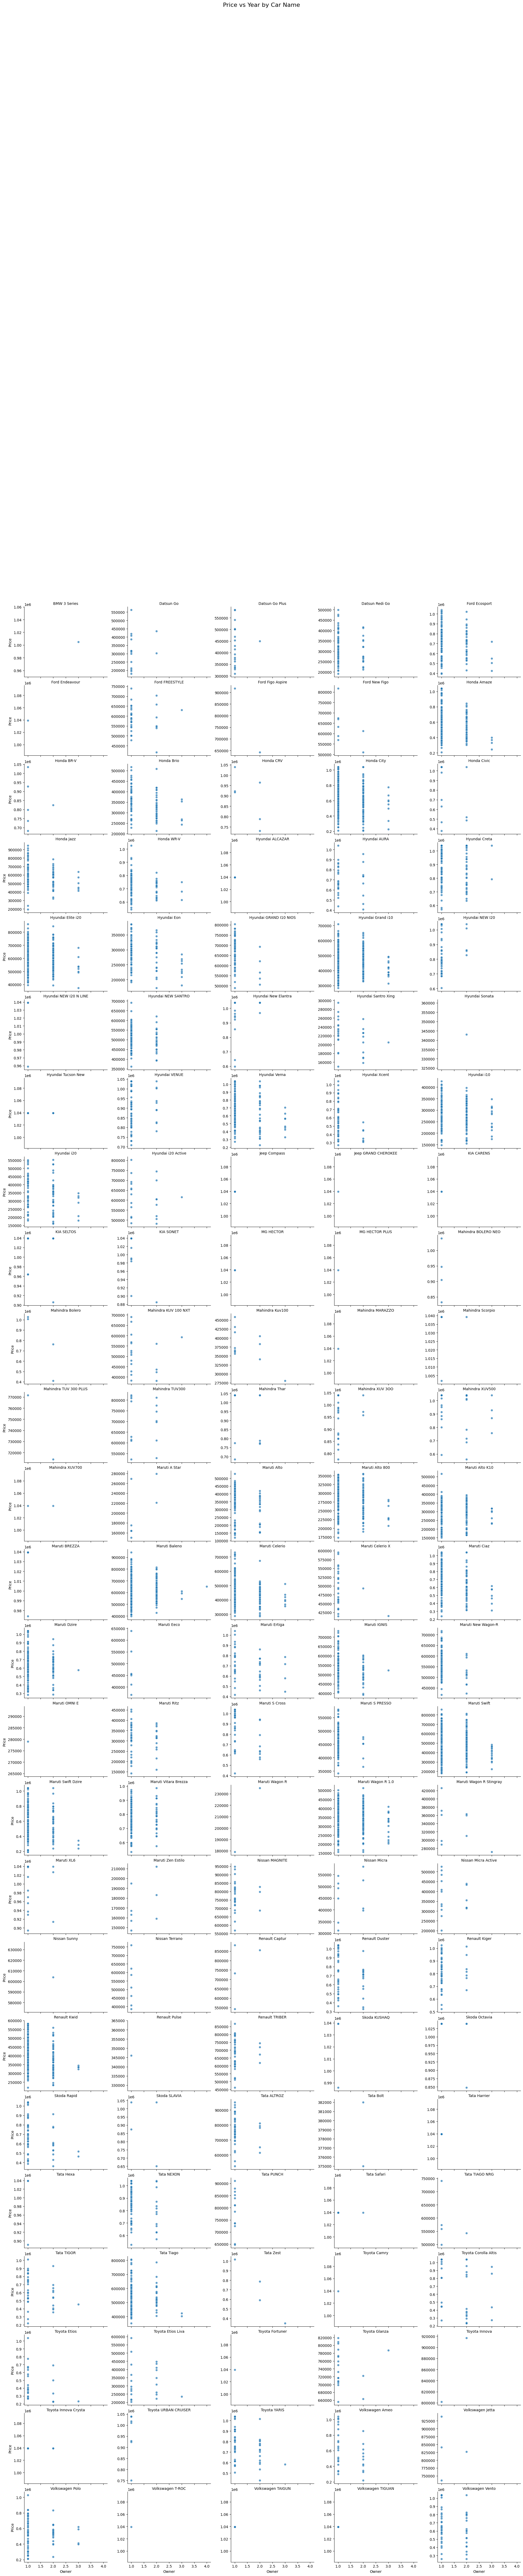

In [161]:
#plot facetGrid: Price vs Year for each Car Name
cars_resale['Car Name'] = cars_resale['Car Name'].astype('category')


g = sns.FacetGrid(cars_resale, col="Car Name", col_wrap=5, height=4, sharey=False)
g.map(sns.scatterplot, "Owner", "Price", alpha=0.7)

#add titles and adjust layout
g.set_titles("{col_name}")
g.set_axis_labels("Owner", "Price")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Price vs Year by Car Name", fontsize=16)
plt.show()

So, we need all the numerical features Year, distance, owners to predict resale price. Also catergorial variables need to be assign as feature. More features like Fuel type, Drive type can explain a business trend.

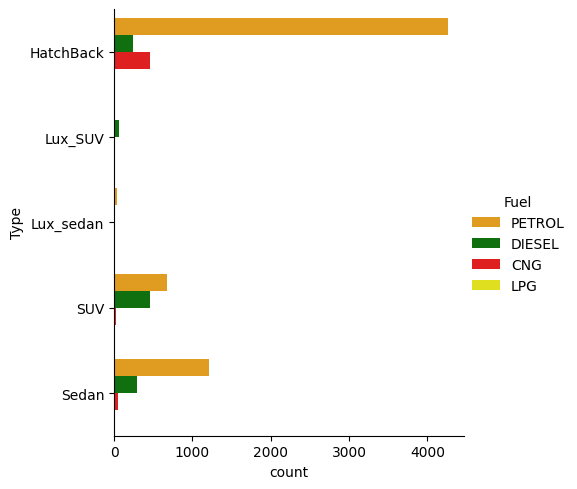

In [164]:
#define a palette of categories
palette = {
    'PETROL': 'orange',
    'DIESEL': 'green',
    'LPG':'yellow',
    'CNG':'red'
}
#plot the cat plot
sns.catplot(

            data=cars_resale, y="Type", hue="Fuel", kind="count",
            palette=palette
)

**Business insight 1. There is greater trend of resale in Hatch Back Petrol fuel vehicle.**

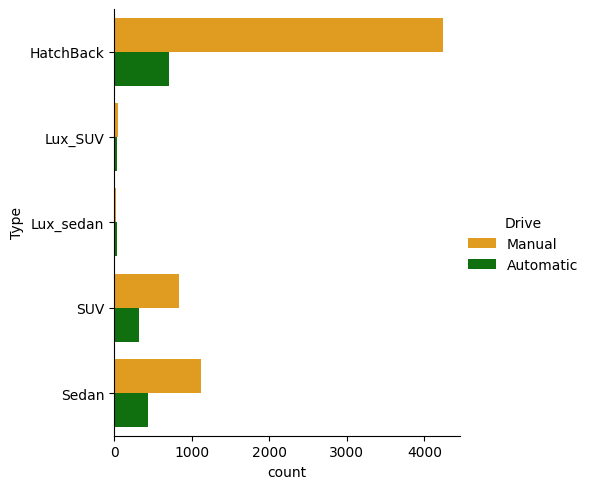

In [166]:
#define a palette of categories
palette = {
    'Manual': 'orange',
    'Automatic': 'green',
    'SEMI-AUTOMATIC': 'red'
}

#plot the cat plot
sns.catplot(

            data=cars_resale, y="Type", hue="Drive", kind="count",
            palette=palette
)

**Business insight 2. There is greater trend in resale of Manual transmission drive cars of Hatch back segment.**

#Feature selection

In [168]:
from sklearn.preprocessing import OrdinalEncoder

#define the ordered categories for the feature
year_category = [['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14']]

#specify the feature to apply ordinal encoding
ordinal_feat_year = ['Year']

#initialize OrdinalEncoder with predefined categories
ordinal_encoder_year = OrdinalEncoder(categories=year_category)


owner_category = [['1', '2', '3', '4']]
ordinal_feat_owner = ['Owner']
ordinal_encoder_owner = OrdinalEncoder(categories=owner_category)

distanceBin_category = [['0-5k', '5k-20k', '20k-50k', '50k-100k', '100k-200k']]
ordinal_feat_distanceBin = ['Distance_Binned']
ordinal_encoder_distanceBin = OrdinalEncoder(categories=distanceBin_category)

In [169]:
from sklearn.preprocessing import OneHotEncoder

#list of categorical features to be one-hot encoded
categorical_feat = ['Car Name','Fuel','Location','Drive','Type',]

#initialize a OneHotEncoder for categorical features
categorical_encoder = OneHotEncoder(sparse_output=False)

OneHotEncoder Converts each unique category in the selected features into a new binary column.


In [170]:
from sklearn.compose import ColumnTransformer

#initialize a ColumnTransformer to apply different transformations to specific columns
ct = ColumnTransformer(transformers=[
        ("ord_year", ordinal_encoder_year, ordinal_feat_year),
        ("ord_owner", ordinal_encoder_owner, ordinal_feat_owner),
        ("ord_distanceBin", ordinal_encoder_distanceBin, ordinal_feat_distanceBin),
        ("cat", categorical_encoder, categorical_feat)
    ])
#ensure the transformed output is returned as a pandas DataFrame
ct.set_output(transform="pandas")

#fit the transformer to the cars_resale dataset and transform it to create the encoded features
encoded_carResale_features = ct.fit_transform(cars_resale)


#Modelling

In [176]:
#assign X & y variables
X = encoded_carResale_features
y = cars_resale['Price']

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

#assign Random forest Regressor as the predictive model
predictive_model = RandomForestRegressor(random_state=42, n_estimators=100)

#train the model on the training dataset
predictive_model.fit(X_train, y_train)

#predictions on the test dataset
y_pred = predictive_model.predict(X_test)


In [172]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
#regr = linear_model.LinearRegression()
#regr.fit(X_train, y_train)
#y_pred = regr.predict(X_test)

In [173]:
#evaluate Model
mse = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mse)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Absolute Error: 58168.9503279822
R-squared: 0.8332827500486236


Mean Absolute Error (MAE): The model predicts car prices with an average error of 58,168, which is relatively low as car prices in the dataset are high (Min- 100000 - Max- 3000000)

R-squared (R²): The model explains 83.3% of the variance in car prices, indicating prediction power of the features (X).

In [175]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


In [177]:
#load business model file
import joblib
joblib.dump(predictive_model, "carResale_predict_model")
model1 = joblib.load("carResale_predict_model")